In [1]:
from swat import *
from pprint import pprint

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [3]:
from dlpy.layers import * 
from dlpy.applications import *
from dlpy import Model, Sequential
from dlpy.utils import *
from dlpy.splitting import two_way_split
from dlpy.lr_scheduler import *
from dlpy.images import *
from dlpy.image_embedding import *
from dlpy.embedding_model import EmbeddingModel

In [4]:
s = CAS('host_name', port_number)
s.sessionprop.setsessopt(caslib='CASUSER', timeout=31535000)

NOTE: 'CASUSER(userid)' is now the active caslib.


+ Elapsed: 0.000158s, user: 9.8e-05s, sys: 4.6e-05s, mem: 0.274mb

# Build a triplet model using ResNet18 as the base branch

In [5]:
#build the base model
resnet18_model = ResNet18_Caffe(s,
                                width=224,
                                height=224
                                #,random_flip='HV',
                                #random_crop='RESIZETHENCROP',
                                #random_mutation='random'
                                )

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Pooling layer added.
NOTE: Pooling layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [6]:
# define your own embedding layer with 4 neurons
embedding_layer = Dense(n=4, act='identity')
model_tr = EmbeddingModel.build_embedding_model(resnet18_model, model_table='test_tr',
                                              embedding_model_type='triplet', margin=-3.0,
                                              embedding_layer=embedding_layer)

NOTE: Convert the branch model into a functional model.
NOTE: Remove the output layers from the model.
NOTE: Model compiled successfully.


# Train the model with  on-the-fly data generation

In [7]:
from dlpy.model import Gpu
gpu = Gpu(devices=1)

In [8]:
from dlpy.model import Optimizer, MomentumSolver, AdamSolver
solver = AdamSolver(lr_scheduler=StepLR(learning_rate=0.0001, step_size=4), clip_grad_max = 100, clip_grad_min = -100)
optimizer = Optimizer(algorithm=solver, mini_batch_size=8, log_level=2, max_epochs=8, reg_l2=0.0001)

The following argument(s) learning_rate, learning_rate_policy, gamma, step_size, power are overwritten by the according arguments specified in lr_scheduler.


In [9]:
# In this case, a pre-defined data set is not given. 
# When the path option is specified, the fit_embedding_model API will generate the data on-the-fly.
# max_iter defines how many data iterations will be performed
# the returned results contains the training information for each data iteration
res = model_tr.fit_embedding_model(optimizer=optimizer, n_threads=4, gpu=gpu, seed=1234,record_seed=23435,
                                   path='server_side_data_location', n_samples=128, max_iter=15, 
                                   resize_width=224, resize_height=224)

Note: data generation took 2.730107545852661 (s) at iteration 0
NOTE: Training from scratch.
NOTE: Using host_name: 1 out of 4 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 33548364.
NOTE:  The approximate memory cost is 885.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       3.54 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 8.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 32.
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  0        0.0001         -0.2284      2.163     3.68
NOTE:  1        0.0001         -0.9947      3.955     0.34
NOTE:  2        0.0001          -1.389      4.882     0.35
NOTE:  3        0.0001          -1.728      6.314     0.33
NOTE:  4          1E-5          -1.669      6.539     0.33
NOTE:  5          1E-5           -2.16      6.468     0.

NOTE: Cloud Analytic Services dropped table ImageData_5jhI0D from caslib CASUSER(userid).
Note: data generation took 1.7545733451843262 (s) at iteration 6
NOTE: Training based on existing weights.
NOTE: Using host_name: 1 out of 4 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 33548364.
NOTE:  The approximate memory cost is 885.00 MB.
NOTE:  Loading weights cost       0.20 (s).
NOTE:  Initializing each layer cost       2.35 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 8.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 32.
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  0        0.0001          -2.064      7.121     3.64
NOTE:  1        0.0001          -2.646      7.299     0.33
NOTE:  2        0.0001          -2.363      8.183     0.35
NOTE:  3        0.0001          -2.747      7.834     0.33
NOTE:  4   

NOTE:  6          1E-5          -2.892      10.35     0.36
NOTE:  7          1E-5          -2.985      10.14     0.39
NOTE:  The optimization reached the maximum number of epochs.
NOTE:  The total time is       6.24 (s).
NOTE: Cloud Analytic Services dropped table ImageData_JzNt7y from caslib CASUSER(userid).
Note: data generation took 1.6364734172821045 (s) at iteration 12
NOTE: Training based on existing weights.
NOTE: Using host_name: 1 out of 4 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 33548364.
NOTE:  The approximate memory cost is 885.00 MB.
NOTE:  Loading weights cost       0.25 (s).
NOTE:  Initializing each layer cost       2.67 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 8.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 32.
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  0        0.0001   

In [10]:
# check the results from the last data iteration
res[-1]

,Descr,Value
0,Model Name,test_tr
1,Model Type,Convolutional Neural Network
2,Number of Layers,163
3,Number of Input Layers,3
4,Number of Output Layers,0
5,Number of Convolutional Layers,63
6,Number of Pooling Layers,6
7,Number of Fully Connected Layers,3
8,Number of Batch Normalization Layers,63
9,Number of Residual Layers,24


# Test the model with a new data generation

In [11]:
my_table_test= ImageEmbeddingTable.load_files(s, path='server_side_data_location', 
                                             embedding_model_type='triplet', label_level=-2, 
                                             resize_width=224, resize_height=224)

In [12]:
model_tr.predict(data=my_table_test, gpu=gpu)

NOTE: Due to data distribution, miniBatchSize has been limited to 7.
NOTE: Using host_name: 1 out of 4 available GPU devices.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           512
 1  Number of Observations Used           512
 2          Mean Absolute Error      10.73834
 3                   Loss Error      -2.40286

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(userid)  Valid_Res_SgIwfs   512       21   
 
                                                  casTable  
 0  CASTable('Valid_Res_SgIwfs', caslib='CASUSER(userid)')  

+ Elapsed: 8.15s, user: 8.11s, sys: 2.55s, mem: 1.28e+03mb

In [13]:
# check the image rankings
tot_obs = s.numrows(table=dict(name=model_tr.valid_res_tbl.name))
correctly_ranked_obs = s.numrows(table=dict(name=model_tr.valid_res_tbl.name, where='_DL_Pred0_ < _DL_Pred1_'))

In [14]:
# most of images are ranked correctly for this toy data set
correctly_ranked_obs['numrows']/tot_obs['numrows']

0.93359375

# Deploy the model with astore

In [15]:
# When model_type='full', the entire model is deployed. However, in many cases, 
# We only want to deploy one branch to extract the image features.
# Specifying model_type='branch' will automatically select the first branch as the feature extraction model.
# The generated astore file will be stored at the client path.
# This also returns the generated branch model
branch_model = model_tr.deploy_embedding_model(output_format='astore', model_type='branch', 
                                path='client_side_path')

NOTE: Model compiled successfully.
NOTE: Model weights attached successfully!
NOTE: Model astore file saved successfully.


In [16]:
# Note we generate a fake classification model here
# The output layer does not generate any useful results.
# The features from the EmbeddingLayer_0 layer will be output when deploying the above astore model
branch_model.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,InputLayer_0,input,,,None,"(224, 224, 3)","(0, 0)",0
1,1,Convo.1,convo,"(7, 7)","(2, 2)",Identity,"(112, 112, 64)","(9408, 0)",118013952
2,2,B.N.1,batchnorm,,,Relu,"(112, 112, 64)","(0, 128)",0
3,3,Pool1,pool,"(3, 3)","(2, 2)",Max,"(56, 56, 64)","(0, 0)",0
4,4,R1C2,convo,"(3, 3)","(1, 1)",Identity,"(56, 56, 64)","(36864, 0)",115605504
5,5,R1B2,batchnorm,,,Relu,"(56, 56, 64)","(0, 128)",0
6,6,R1C3,convo,"(3, 3)","(1, 1)",Identity,"(56, 56, 64)","(36864, 0)",115605504
7,7,R1B3,batchnorm,,,Relu,"(56, 56, 64)","(0, 128)",0
8,8,R1C0,convo,"(1, 1)","(1, 1)",Identity,"(56, 56, 64)","(4096, 0)",12845056
9,9,R1B0,batchnorm,,,Identity,"(56, 56, 64)","(0, 128)",0


# Test the astore model using clustering

In [17]:
# load the generated astore file from the client side into CAS
with open('client_side_path_that_contains_the_astore_file', mode='rb') as file: 
    fileContent = file.read()
# load the astore action set    
s.loadactionset('astore')
# upload it to CAS
store_ = sw.blob(fileContent)
s.astore.upload(rstore=dict(name='test_tr_branch', replace=True),store = store_)

NOTE: Added action set 'astore'.
NOTE: 44793765 bytes were uploaded to the table "test_tr_branch" in the caslib "CASUSER(userid)".


+ Elapsed: 0.0717s, user: 0.0274s, sys: 0.0441s, mem: 87mb

In [18]:
# check the astore information
# note that the useful image embedding columns are
# _LayerAct_53_0_0_0_ to _LayerAct_53_0_0_3_
# these stores 4 numbers as the learned image embedding vector
s.astore.describe(rstore='test_tr_branch')

[Key]

 Store Key
 
                                         Key
 0  E1175C1B060E0DBD81768DFDE08159AAED2455CD

[Description]

 Basic Information
 
          Attribute               Value
 0  Analytic Engine           deeplearn
 1     Time Created  20Jan2020:10:29:14

[InputVariables]

 Input Variables
 
       Name     Length   Role       Type    RawType FormatName
 0  _image_  1000000.0  Input  Varbinary  Character           

[OutputVariables]

 Output Variables
 
                   Name  Length       Type                              Label
 0      P__fake_output_     8.0        Num           Predicted: _fake_output_
 1      I__fake_output_    12.0  Character                Into: _fake_output_
 2  _LayerAct_53_0_0_0_     8.0        Num  Output for Layer embeddinglayer_0
 3  _LayerAct_53_0_0_1_     8.0        Num  Output for Layer embeddinglayer_0
 4  _LayerAct_53_0_0_2_     8.0        Num  Output for Layer embeddinglayer_0
 5  _LayerAct_53_0_0_3_     8.0        Num  Output for Layer embeddinglayer_0

+ Elapsed: 0.986s, user: 0.914s, sys: 0.0687s, mem: 197mb

In [19]:
# use the first image column from the previous test table to check the learned embedding
my_table_one_image_col = ImageTable.from_table(my_table_test, path_col='_path_')

In [20]:
my_table_one_image_col.label_freq

,Level,Frequency
german_shepherd,1,88
golden_retriever,2,80
labrador_retriever,3,113
miniature_poodle,4,103
soft-coated_wheaten_terrier,5,70
toy_poodle,6,58


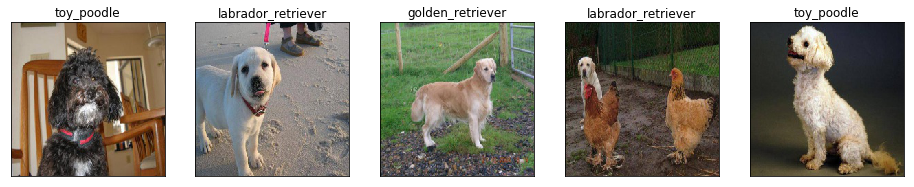

In [21]:
my_table_one_image_col.show()

In [22]:
# generate the image embedding by calling the astore.score action with one GPU
s.score(rstore = 'test_tr_branch',
        table = my_table_one_image_col,
        nthreads =1,
        copyvars=['_filename_0', '_label_'],
        options=[dict(name='usegpu', value='1'),
                 dict(name='NDEVICES', value='1'), 
                 dict(name='DEVICE0', value='0')
                ],
        out = dict(name='astore_score1_branch_gpu', replace=True))

[OutputCasTables]

             casLib                      Name  Rows  Columns  \
 0  CASUSER(userid)  astore_score1_branch_gpu   512        8   
 
                                                          casTable  
 0  CASTable('astore_score1_branch_gpu', caslib='CASUSER(userid)')  

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.000041  0.000009
 1  Creating the State  3.000381  0.668343
 2             Scoring  1.488682  0.331608
 3               Total  4.489286  1.000000

+ Elapsed: 4.79s, user: 3.53s, sys: 0.837s, mem: 285mb

In [23]:
# check the generated image embedding
s.fetch(table='astore_score1_branch_gpu', fetchVars=['_LayerAct_53_0_0_0_', '_LayerAct_53_0_0_0_', 
                                                     '_LayerAct_53_0_0_1_', '_LayerAct_53_0_0_2_'],
       to=5)

,_LayerAct_53_0_0_0_,_LayerAct_53_0_0_0_2,_LayerAct_53_0_0_1_,_LayerAct_53_0_0_2_
0,-5.325044,-5.325044,-2.416524,4.890401
1,1.722038,1.722038,-4.249690,-0.702655
2,0.747303,0.747303,-1.835435,-3.812456
3,1.098348,1.098348,-3.845205,-0.845681
4,-4.303374,-4.303374,-2.094092,3.849435


In [24]:
# use these generated vectors for clustering
feature_list=[]
for i in range(0, 4):
    feature_list.append("_LayerAct_53_0_0_" + str(i) +"_")

In [25]:
s.loadactionset('clustering')
s.kclus(table=dict(name='astore_score1_branch_gpu'),
        maxClusters=6, maxIters=100, standardize='std',
        inputs=feature_list,
        output=dict(casout=dict(name='cluster_results', replace=True),
                   copyvars=['_filename_0', '_label_']))

NOTE: Added action set 'clustering'.
NOTE: Using SEED=272398260.
NOTE: Running for input data for K 6.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.


[outputSize]

 {'outputNObs': 512.0, 'outputNVars': 5}

[NObs]

 Number of Observations
 
                           Type      N
 0  Number of Observations Read  512.0
 1  Number of Observations Used  512.0

[ModelInfo]

 Model Information
 
                              RowId                        Parameter  \
 0             Clustering_Algorithm             Clustering Algorithm   
 1               Maximum_Iterations               Maximum Iterations   
 2                   Stop_Criterion                   Stop Criterion   
 3             Stop_Criterion_Value             Stop Criterion Value   
 4                         Clusters                         Clusters   
 5                   Initialization                   Initialization   
 6                             Seed                             Seed   
 7  Distance_For_Interval_Variables  Distance for Interval Variables   
 8                  Standardization                  Standardization   
 9              Interval_Imputation              Interval Imputation   
 
           Setting  
 0         K-means  
 1             100  
 2  Cluster Change  
 3               0  
 4               6  
 5           Forgy  
 6       272398260  
 7       Euclidean  
 8             Std  
 9            None  

[DescStats]

 Descriptive Statistics
 
               Variable      Mean    StdDev
 0  _LayerAct_53_0_0_0_  0.213067  2.752806
 1  _LayerAct_53_0_0_1_ -2.068026  1.622914
 2  _LayerAct_53_0_0_2_ -0.686751  3.566519
 3  _LayerAct_53_0_0_3_ -0.383602  2.939488

[WithinClusStats]

 Within Cluster Statistics
 
                Variable  Cluster      Mean    StdDev
 0   _LayerAct_53_0_0_0_        1  0.498266  0.475639
 1                              2  0.310631  0.354104
 2                              3 -0.795028  0.411000
 3                              4 -1.676549  0.318300
 4                              5 -0.437695  0.334401
 5                              6  1.266967  0.399297
 6   _LayerAct_53_0_0_1_        1 -1.113885  0.674613
 7                              2 -0.452273  0.427001
 8                              3  0.342026  0.378578
 9                              4 -0.718752  0.656478
 10                             5  1.401880  0.615447
 11                             6  0.573362  0.504471
 12  _LayerAct_53_0_0_2_        1  0.137551  0.301269
 13                             2 -1.085236  0.338279
 14                             3 -0.266910  0.317975
 15                             4  1.086793  0.381334
 16                             5  1.714837  0.411057
 17                             6 -0.847687  0.471057
 18  _LayerAct_53_0_0_3_        1 -1.105901  0.333472
 19                             2  1.806022  0.372000
 20                             3  0.519091  0.509520
 21                             4 -0.634552  0.261857
 22                             5  0.020020  0.248091
 23                             6 -0.350988  0.438587

[Standardization]

 Standardization
 
               Variable  Location     Scale
 0  _LayerAct_53_0_0_0_  0.213067  2.752806
 1  _LayerAct_53_0_0_1_ -2.068026  1.622914
 2  _LayerAct_53_0_0_2_ -0.686751  3.566519
 3  _LayerAct_53_0_0_3_ -0.383602  2.939488

[ClusterSum]

 Cluster Summary
 
    Cluster  Frequency   MinDist   MaxDist   AvgDist        SSE  StdDeviation  \
 0        1      107.0  0.261227  2.413996  0.809064  93.629923      0.935439   
 1        2       74.0  0.469888  1.199631  0.718660  40.919119      0.743614   
 2        3      104.0  0.108321  1.515720  0.735802  69.315035      0.816389   
 3        4       55.0  0.258678  1.310942  0.791396  40.298203      0.855976   
 4        5       70.0  0.236254  1.816941  0.732388  49.757012      0.843098   
 5        6      102.0  0.259985  1.794348  0.839249  83.646392      0.905573   
 
    NearestClus  DBtwCentroids  
 0          6.0       2.231209  
 1          3.0       2.044320  
 2          2.0       2.044320  
 3          3.0       2.250718  
 4          3.0       2.329672  
 5          1.

In [26]:
# we can get six quite good clusters only using a vector with 4 numbers
# each cluster is only dominated by a single class
s.freq(table=dict(name='cluster_results', groupby='_cluster_id_'), inputs='_label_')

[ByGroupInfo]

 ByGroupInfo
 
    _CLUSTER_ID_ _CLUSTER_ID__f         _key_
 0           1.0              1             1
 1           2.0              2             2
 2           3.0              3             3
 3           4.0              4             4
 4           5.0              5             5
 5           6.0              6             6

[ByGroup1.Frequency]

 Frequency for CLUSTER_RESULTS
 
                Column             CharVar              FmtVar  Level  \
 _CLUSTER_ID_                                                           
 1             _label_  labrador_retriever  labrador_retriever      1   
 1             _label_    miniature_poodle    miniature_poodle      2   
 1             _label_          toy_poodle          toy_poodle      3   
 
               Frequency  
 _CLUSTER_ID_             
 1                  99.0  
 1                   3.0  
 1                   5.0  

[ByGroup2.Frequency]

 Frequency for CLUSTER_RESULTS
 
                Column           CharVar            FmtVar  Level  Frequency
 _CLUSTER_ID_                                                               
 2             _label_  golden_retriever  golden_retriever      1       74.0

[ByGroup3.Frequency]

 Frequency for CLUSTER_RESULTS
 
                Column           CharVar            FmtVar  Level  Frequency
 _CLUSTER_ID_                                                               
 3             _label_  golden_retriever  golden_retriever      1        6.0
 3             _label_  miniature_poodle  miniature_poodle      2       98.0

[ByGroup4.Frequency]

 Frequency for CLUSTER_RESULTS
 
                Column           CharVar            FmtVar  Level  Frequency
 _CLUSTER_ID_                                                               
 4             _label_  miniature_poodle  miniature_poodle      1        2.0
 4             _label_        toy_poodle        toy_poodle      2       53.0

[ByGroup5.Frequency]

 Frequency for CLUSTER_RESULTS
 
                Column                      CharVar  \
 _CLUSTER_ID_                                         
 5             _label_  soft-coated_wheaten_terrier   
 
                                    FmtVar  Level  Frequency  
 _CLUSTER_ID_                                                 
 5             soft-coated_wheaten_terrier      1       70.0  

[ByGroup6.Frequency]

 Frequency for CLUSTER_RESULTS
 
                Column             CharVar              FmtVar  Level  \
 _CLUSTER_ID_                                                           
 6             _label_     german_shepherd     german_shepherd      1   
 6             _label_  labrador_retriever  labrador_retriever      2   
 
               Frequency  
 _CLUSTER_ID_             
 6                  88.0  
 6                  14.0  

+ Elapsed: 0.0112s, user: 0.0111s, sys: 0.00724s, mem: 11.9mb

In [27]:
# close the session
s.endsession()

+ Elapsed: 9.2e-05s, user: 7.5e-05s, sys: 8e-06s, mem: 0.203mb